# Finite differences - introduction - part 2

The content of this topic is based on the amazing book **Finite Difference Computing with Exponential Decay Models**, which can be freely accessed as a [GitHub page](https://hplgit.github.io/decay-book/doc/web/index.html) or as a [book](http://link.springer.com/book/10.1007%2F978-3-319-29439-1) in the Springer series Lecture Notes in Computational Science and Engineering. This seminal work is authored by [Professor Hans Petter Langtangen](http://hplgit.github.io/homepage/index.html).

This book uses an ordinary differential equation <a href="https://en.wikipedia.org/wiki/Ordinary_differential_equation"><sup>[1]</sup></a> <a href="http://mathworld.wolfram.com/OrdinaryDifferentialEquation.html"><sup>[2]</sup></a> <a href="http://tutorial.math.lamar.edu/Classes/DE/DE.aspx"><sup>[3]</sup></a> describing an [exponential decay process](https://en.wikipedia.org/wiki/Exponential_decay) to illustrate fundamental concepts in mathematics and computer science.

## Analysis of the stability properties

The algorithm presented in part 1 can be rewritten as follows:

$$
\begin{split}
u^{0} &= C_{0} \\
u^{1} &= u^{0} \lambda \\
u^{2} &= u^{0} \lambda^{2} \\
u^{3} &= u^{0} \lambda^{3} \\
& \quad \vdots \\
u^{N} &= u^{0} \lambda^{N}
\end{split} \: ,
$$

where 

$$
\lambda = \frac{1 - \left( \, 1 - \theta \, \right) \alpha \, \Delta t}{1 + \theta \, \alpha \, \Delta t} \: .
$$

The EDO we have solved numerically represents an exponential decay process. Consequently, our solution must satisfy $u^{\, n} \gt u^{\, n+1}$, for $n = 0, 1, \dots, N-1 \: .$ This characteristic leads us to the following question: what about $\lambda$? can it assume arbitrary values?

The factor $\lambda$ depends on $\theta$, $\alpha$, and $\Delta t$. Notice that, in order to produce meaningful solutions (solutions that properly represents a decay process), the condition $0 < \lambda < 1$ must be satisfied. The parameter $\theta$ is defined a priori and determines the scheme to be used for solving the EDO (FE, BE, or CN - see part 1). The parameter $\alpha$ is the coefficient of the EDO and, consequently, it is known. Then, it seems logical to analyze the influence of $\Delta t$ on the algorithm. So, given $\theta$ and $\alpha$, is there an otpimum $\Delta t$?

### FE scheme ($\theta$ = 0)

$$
\lambda = 1 - \alpha \, \Delta t \: , \quad \alpha > 0 \: , \quad \Delta t > 0 \: .
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 2.71

dt = np.linspace(0., 3./alpha, 21)

dt_min = np.min(dt)
dt_max = np.max(dt)

lamb_FE = 1. - alpha*dt

lamb_max_FE = np.max(lamb_FE)
lamb_min_FE = np.min(lamb_FE)

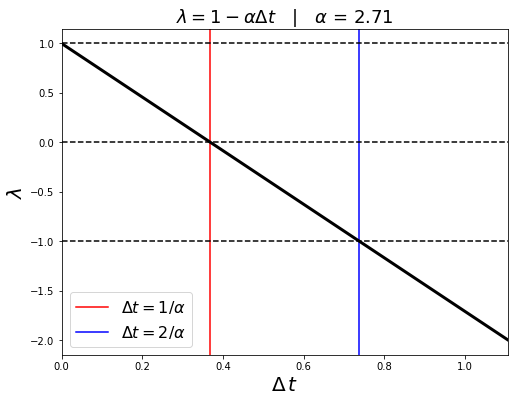

In [3]:
plt.figure(figsize=(8,6))
plt.title('$\lambda = 1 - \\alpha \Delta t$   |   $\\alpha$ = %.2f' % alpha, fontsize = 18)
plt.plot([1./alpha, 1./alpha], 
         [lamb_min_FE - 0.05*(lamb_max_FE - lamb_min_FE), 
         lamb_max_FE + 0.05*(lamb_max_FE - lamb_min_FE)], '-r', \
         label='$\Delta t = 1 / \\alpha}$')
plt.plot([2./alpha, 2./alpha], 
         [lamb_min_FE - 0.05*(lamb_max_FE - lamb_min_FE), 
         lamb_max_FE + 0.05*(lamb_max_FE - lamb_min_FE)], '-b', \
         label='$\Delta t = 2 / \\alpha}$')
plt.plot([dt_min, dt_max], [1., 1.], 'k--')
plt.plot([dt_min, dt_max], [0., 0.], 'k--')
plt.plot([dt_min, dt_max], [-1., -1.], 'k--')
plt.plot(dt, lamb_FE, '-k', linewidth=3)
plt.ylim(lamb_min_FE - 0.05*(lamb_max_FE - lamb_min_FE), 
         lamb_max_FE + 0.05*(lamb_max_FE - lamb_min_FE))
plt.xlim(dt_min, dt_max)
plt.ylabel('$\lambda$', fontsize=20)
plt.xlabel('$\Delta \, t$', fontsize=20)
plt.legend(loc='lower left', fontsize = 16)
plt.show()

The Figure above shows that:

1) $\Delta t = \frac{1}{\alpha} \Longrightarrow \lambda = 0$


2) $\Delta t > \frac{1}{\alpha} \Longrightarrow \lambda < 0$


3) $\Delta t < \frac{1}{\alpha} \Longrightarrow \lambda > 0$


4) $\Delta t = \frac{2}{\alpha} \Longrightarrow \lambda = -1$


5) $\Delta t > \frac{2}{\alpha} \Longrightarrow \lambda < -1$


6) $\Delta t < \frac{2}{\alpha} \Longrightarrow \lambda > -1$

resulting that 

* $0 < \Delta t < \frac{1}{\alpha}$ produces meaningful solutions;


* $\frac{1}{\alpha} < \Delta t < \frac{2}{\alpha}$ produces decreasing oscillatory solutions;


* $\Delta t > \frac{2}{\alpha}$ produces growing oscillatory solutions.

### BE scheme ($\theta$ = 1)

$$
\lambda = \frac{1}{1 + \alpha \, \Delta t} \: , \quad \alpha > 0 \: , \quad \Delta t > 0 \: .
$$

Notice that, due to the conditions $\alpha > 0$ and $\Delta t > 0$, the condition $0 < \lambda < 1$ is always satisfied and, consequently, the BE scheme produces meaningful solutions for any $\Delta t$.

### CN scheme ($\theta$ = $\frac{1}{2}$)

$$
\lambda = \frac{1 - \frac{1}{2}\alpha \, \Delta t}{1 + \frac{1}{2}\alpha \, \Delta t} \: , \quad \alpha > 0 \: , \quad \Delta t > 0 \: .
$$

Notice that, in this case, $\lambda < 1$ for any $\Delta t$. 

In [4]:
alpha = 2.71

dt = np.linspace(0., 3./alpha, 21)

dt_min = np.min(dt)
dt_max = np.max(dt)

lamb_CN = (1. - 0.5*alpha*dt)/(1. + 0.5*alpha*dt)

lamb_max_CN = np.max(lamb_CN)
lamb_min_CN = np.min(lamb_CN)

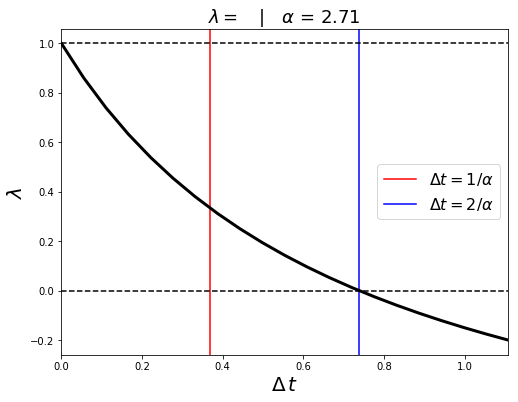

In [5]:
plt.figure(figsize=(8,6))
plt.title('$\lambda = \frac{1 + \frac{1}{2} \\alpha \Delta t}{1 - \frac{1}{2} \\alpha \Delta t}$   |   $\\alpha$ = %.2f' % alpha, fontsize = 18)
plt.plot([1./alpha, 1./alpha], 
         [lamb_min_CN - 0.05*(lamb_max_CN - lamb_min_CN), 
         lamb_max_CN + 0.05*(lamb_max_CN - lamb_min_CN)], '-r', \
         label='$\Delta t = 1 / \\alpha}$')
plt.plot([2./alpha, 2./alpha], 
         [lamb_min_CN - 0.05*(lamb_max_CN - lamb_min_CN), 
         lamb_max_CN + 0.05*(lamb_max_CN - lamb_min_CN)], '-b', \
         label='$\Delta t = 2 / \\alpha}$')
plt.plot([dt_min, dt_max], [1., 1.], 'k--')
plt.plot([dt_min, dt_max], [0., 0.], 'k--')
plt.plot([dt_min, dt_max], [-1., -1.], 'k--')
plt.plot(dt, lamb_CN, '-k', linewidth=3)
plt.ylim(lamb_min_CN - 0.05*(lamb_max_CN - lamb_min_CN), 
         lamb_max_CN + 0.05*(lamb_max_CN - lamb_min_CN))
plt.xlim(dt_min, dt_max)
plt.ylabel('$\lambda$', fontsize=20)
plt.xlabel('$\Delta \, t$', fontsize=20)
plt.legend(loc='center right', fontsize = 16)
plt.show()

The Figure above shows that:

1) $\Delta t = \frac{2}{\alpha} \Longrightarrow \lambda = 0$


2) $\Delta t > \frac{2}{\alpha} \Longrightarrow \lambda < 0$


3) $\Delta t < \frac{2}{\alpha} \Longrightarrow \lambda > 0$

resulting that 

* $0 < \Delta t < \frac{2}{\alpha}$ produces meaningful solutions;


* $\Delta t > \frac{2}{\alpha}$ produces decreasing oscillatory solutions.

### Summary of the stability properties

| Scheme |   Stability with respect to growing solutions   |   Stabilyty with respect to oscillatory solutions   |
|:------:|:-----------------------------------------------:|:---------------------------------------------------:|
|FE|CS$^{\dagger}$ with criterion $\Delta t < \frac{1}{\alpha}$ |CS$^{\dagger}$ with criterion $\Delta t < \frac{2}{\alpha}$|
| BE     |                  US$^{\ddagger}$                |                US$^{\ddagger}$                      |
| CN     |                US$^{\ddagger}$           | CS$^{\dagger}$ with criterion $\Delta t < \frac{2}{\alpha}$|


$^{\dagger}$ *Conditionally Stable*, $^{\ddagger}$ *Unconditionally Stable*

This table summarizes the stability properties of the schemes FE, BE, and CN with respect to growing and oscillatory solutions. For example, this Table shows that the FE scheme is *conditionally stable* with respect to growing solution and that $\Delta t < \frac{1}{\alpha}$ is the criterion for avoiding growing solutions. On the other hand, the BE scheme is *unconditionally stable* with respect to both growing and oscillatory solutions, which means that this scheme cannot produce neither growing nor oscillatory solutions.

## Generalizations

The exponential decay EDO can be generalized by including a variable coefficient $\alpha(t)$ and a source term $f(t)$ as follows:

$$
u^{\prime}(t) = -\alpha(t) \, u(t) + f(t) \: , \quad 0 > t < T \: .
$$

In this case, the algorithm is modified according to the cell below:

$$
u^{n+1} = \frac{\left[ 1 - \left( \, 1 - \theta \, \right) \alpha^{\, n} \Delta t \right] u^{n} +
\Delta t \, \left[ \left( \, 1 - \theta \, \right) f^{n} + \theta \, f^{n+1} \right] }
{1 + \theta \, \alpha^{\, n+1} \Delta t} \: ,
$$

where $\alpha^{\, n} \approx \alpha(t_{n})$, $\alpha^{\, n+1} \approx \alpha(t_{n+1})$, $f^{n} \approx f(t_{n})$, and $f^{n+1} \approx f(t_{n+1})$.

For readers interested in more generalizations, I recommend see the section [Generalizations](https://hplgit.github.io/decay-book/doc/pub/book/sphinx/._book006.html#generalizations) of the Professor Hans' book.

### Exercise

1. Use the code implemented in the part 1 for verifying the stability conditions of the FE, Be, and CN schemes.
2. Modify the code implemented in the part 1 for including a variable coefficient and a term source.
3. Test the new code with a [constant solution](https://hplgit.github.io/decay-book/doc/pub/book/sphinx/._book006.html#verifying-a-constant-solution) and a [linear solution](https://hplgit.github.io/decay-book/doc/pub/book/sphinx/._book006.html#verification-via-manufactured-solutions).